# Plan your trip with Kayak

Goals 🎯
As the project has just started, your team doesn't have any data that can be used to create this application. Therefore, your job will be to:

- Scrape data from destinations
- Get weather data from each destination
- Get hotels' info about each destination
- Store all the information above in a data lake
- Extract, transform and load cleaned data from your datalake to a data warehouse

In [1]:
import pandas as pd, requests

In [2]:
import os 
import logging
from typing import Dict, Tuple, List

In [3]:
import operator
import numpy as np
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

## Cities to be processed

In [4]:
cities = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg",
          "Chateau du Haut Koenigsbourg","Colmar","Eguisheim","Besancon","Dijon","Annecy","Grenoble","Lyon",
          "Bormes les Mimosas","Cassis","Marseille","Aix en Provence","Avignon","Uzes","Nimes",
          "Aigues Mortes","Saintes Maries de la mer","Collioure","Carcassonne","Ariege","Toulouse","Montauban",
          "Biarritz","Bayonne","La Rochelle"]

## Retrieve cities' coordinates

In [5]:
def retrieve_one_city(city:str)->dict:
    '''
    Retrieves location data of a city and puts it in a dictionary.  The data retrieved is:
      place_id': 256949255,
     'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
     'osm_type'
     'osm_id'
     'boundingbox': ['48.6119741', '48.637031', '-1.5495487', '-1.5094805'],
     'lat': Latitude
     'lon': Longitude
     'display_name': 'Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France',
     'place_rank': 16,
     'category': 'boundary',
     'type': 'administrative',
     'importance': 
     'icon':
    -----------------------------
    Parameters
    -----------------------------
    city: The city name
   
    Returns:
      Dictionary with city data
    
    '''
    url = f'https://nominatim.openstreetmap.org/search?country=France&format=jsonv2&class=boundary&limit=1&city={city}'
    result = requests.get(url)
    try:
        print(f'API nominatim response : {city} ')
        return result.json()[0]
    except IndexError as error:
        print('There is no result in the query for {city}')
        return None

Test the url 

In [6]:
url ='https://nominatim.openstreetmap.org/status.php'
result = requests.get(url)
print(result)


<Response [200]>


In [7]:
def retrieve_cities(city_names)->list:
    '''
    Takes a list of city names and retrieve the cities data into a list with dictionary elements.
    Parameters
    ---------------
       city_names: List like of str elements
    
    Returns 
       A list of dict objects
    '''
    
    retrieved_cities = list()
    for city in city_names:
        print(f'Retrieving coordinates from {city} ...')
        data = retrieve_one_city(city) #city_data is a dictionary
        if data is not None:
            city_dict = {'place': city, **data} ## ** used to unpack the elements of the dictionary
            retrieved_cities.append(city_dict)   
        else:
            print(f'No coordinates found for {city}')
    return retrieved_cities

Launch city retrieval from https://nominatim.openstreetmap.org

In [8]:
retrieved_cities=retrieve_cities(cities)

Retrieving coordinates from Mont Saint Michel ...
API nominatim response : Mont Saint Michel 
Retrieving coordinates from St Malo ...
API nominatim response : St Malo 
Retrieving coordinates from Bayeux ...
API nominatim response : Bayeux 
Retrieving coordinates from Le Havre ...
API nominatim response : Le Havre 
Retrieving coordinates from Rouen ...
API nominatim response : Rouen 
Retrieving coordinates from Paris ...
API nominatim response : Paris 
Retrieving coordinates from Amiens ...
API nominatim response : Amiens 
Retrieving coordinates from Lille ...
API nominatim response : Lille 
Retrieving coordinates from Strasbourg ...
API nominatim response : Strasbourg 
Retrieving coordinates from Chateau du Haut Koenigsbourg ...
API nominatim response : Chateau du Haut Koenigsbourg 
Retrieving coordinates from Colmar ...
API nominatim response : Colmar 
Retrieving coordinates from Eguisheim ...
API nominatim response : Eguisheim 
Retrieving coordinates from Besancon ...
API nominatim r

In [9]:
len(retrieved_cities)

33

### Put retrieved cities in a data frame

In [10]:
cities_df = pd.DataFrame(retrieved_cities)

In [11]:
cities_df.head(4)

place   place_id  \
0  Mont Saint Michel  151486647   
1            St Malo  282098015   
2             Bayeux  281962470   
3           Le Havre  282341149   

                                             licence  osm_type     osm_id  \
0  Data © OpenStreetMap contributors, ODbL 1.0. h...       way  211285890   
1  Data © OpenStreetMap contributors, ODbL 1.0. h...  relation     905534   
2  Data © OpenStreetMap contributors, ODbL 1.0. h...  relation     145776   
3  Data © OpenStreetMap contributors, ODbL 1.0. h...  relation     104492   

                                        boundingbox         lat  \
0   [48.6349172, 48.637031, -1.5133292, -1.5094796]  48.6359541   
1  [48.5979853, 48.6949736, -2.0765246, -1.9367259]   48.649518   
2  [49.2608124, 49.2934736, -0.7275671, -0.6757378]  49.2764624   
3    [49.4516697, 49.5401463, 0.0667992, 0.1955556]  49.4938975   

                  lon                                       display_name  \
0  -1.511459954959514  Mont Saint-Michel, Le Mont-Saint-Michel, Avran...   
1          -2.0260409  Saint-Malo, Ille-et-Vilaine, Bretagne, France ...   
2          -0.7024738  Bayeux, Calvados, Normandie, France métropolit...   
3           0.1079732  Le Havre, Seine-Maritime, Normandie, France mé...   

   place_rank  category            type  importance  \
0          20     place           islet    0.865437   
1          16  boundary  administrative    0.786467   
2          16  boundary  administrative    0.792700   
3          16  boundary  administrative    0.932333   

                                                icon  
0                                                NaN  
1  https://nominatim.openstreetmap.org/ui/mapicon...  
2  https://nominatim.openstreetmap.org/ui/mapicon...  
3  https://nominatim.openstreetmap.org/ui/mapicon...

In [12]:
cities_df[cities_df['place'] == 'Strasbourg']

place   place_id                                            licence  \
8  Strasbourg  281833860  Data © OpenStreetMap contributors, ODbL 1.0. h...   

   osm_type  osm_id                                    boundingbox        lat  \
8  relation   71033  [48.491861, 48.6461896, 7.6881371, 7.8360646]  48.584614   

         lon                                       display_name  place_rank  \
8  7.7507127  Strasbourg, Bas-Rhin, Grand Est, France métrop...          16   

   category            type  importance  \
8  boundary  administrative    0.894805   

                                                icon  
8  https://nominatim.openstreetmap.org/ui/mapicon...

Change type of lat and lon attributes

In [28]:
cities_df.to_csv('../data/cities.csv', sep='\t')

In [29]:
coords = list(zip(cities_df.lat.to_list(), cities_df.lon.to_list()))

In [30]:
coords

[('48.6359541', '-1.511459954959514'),
 ('48.649518', '-2.0260409'),
 ('49.2764624', '-0.7024738'),
 ('49.4938975', '0.1079732'),
 ('49.4404591', '1.0939658'),
 ('48.8588897', '2.3200410217200766'),
 ('49.8941708', '2.2956951'),
 ('50.6365654', '3.0635282'),
 ('48.584614', '7.7507127'),
 ('48.2495226', '7.3454923'),
 ('48.0777517', '7.3579641'),
 ('48.0447968', '7.3079618'),
 ('47.2380222', '6.0243622'),
 ('47.3215806', '5.0414701'),
 ('45.8992348', '6.1288847'),
 ('45.1875602', '5.7357819'),
 ('45.7578137', '4.8320114'),
 ('43.1572172', '6.329253867921363'),
 ('43.2140359', '5.5396318'),
 ('43.2961743', '5.3699525'),
 ('43.5298424', '5.4474738'),
 ('43.9492493', '4.8059012'),
 ('44.0121279', '4.4196718'),
 ('43.8374249', '4.3600687'),
 ('43.5658225', '4.1912837'),
 ('43.4522771', '4.4287172'),
 ('42.52505', '3.0831554'),
 ('43.2130358', '2.3491069'),
 ('43.6044622', '1.4442469'),
 ('44.0175835', '1.3549991'),
 ('43.4832523', '-1.5592776'),
 ('43.4933379', '-1.475099'),
 ('46.1591126',

### Retrieve weather data for the cities

Transform lat et lon attributs from str to float

In [13]:
cities_df = cities_df.astype({'lat':np.float16, 'lon':np.float16})

## Getting the weather

In [14]:
# Create a class City that will be used as a container to stock information of a city
class City:
    def __init__(self, place_id, name, coords:tuple):
        self._place_id=place_id
        self._name=name
        self._coords=coords
        self._scrapped = {}
    
    @property
    def place_id(self):
        return self._place_id
    @property
    def name(self):
        return self._name
    
    @property
    def coords(self):
        return self._coords
    @property
    def scrapped(self):
        return self._scrapped
        
    @scrapped.setter
    def scrapped(self,value:dict):
        self._scrapped=value
    
    @staticmethod
    def from_dataframe(dataframe: pd.DataFrame):
        '''
        Create a list of objects of class City from a rows of a DataFrame
        '''
        #TODO Check first if it contains the columns we need
        cities=list()
        try:
            for index_row in range(0,dataframe.shape[0]):
                place_id = str(dataframe.loc[index_row, 'place_id'])
                coords = (dataframe.loc[index_row, 'lat'], dataframe.loc[index_row, 'lon'])
                name = dataframe.loc[index_row, 'place']
                city = City(place_id, name, coords)
                cities.append(city)
        except KeyError as keyerr:
            print('The dataframe doesn''t have all required keys')
            return None
        else:
            return cities
        
    def __str__(self):
        return f'city:{self.name} place_id:{self.place_id} coords:{self.coords} scrapped:{self.scrapped}'

#### Create a list of objects City

In [15]:
# Create a list of City objects
cities_list = City.from_dataframe(cities_df)

In [16]:
def read_api_key():
    pass

In [17]:
def get_weather(cities:List[City]):
    '''
    For every city in the list of cities, retrieves the weather data and completes it directly in each object City
    The scrapped results from scraping will be set in scrapped attribute
    Parameters
    ---------------
    cities: List of elements of type City
    
    Returns
    Nothing.  The input list is changed  
    
    '''
    api_key='662b304886186ebe717af2be19cb4764' # The key for the API
    units='metric'
    part='minutely,hourly'
    for city in cities:
        lat=city.coords[0]
        lon=city.coords[1]
        url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={api_key}&units={units}'
        r = requests.get(url)
        city.scrapped=r.json()

### Functions to process cities with weather

In [18]:
def add_place_to_dict(city:City):
    city.scrapped['place_id']=city.place_id
    city.scrapped['current']['place_id'] = city.place_id
    city.scrapped['place']=city.name
     #data['place_id'] = place_id

In [19]:
def add_place_to_list(city:City):
    '''
    Retrieves the forecast list from the scrapped data and adds the place_id to each dictionary in the list.
    '''
    for day_dict in city.scrapped['daily']: #city.scrapped['daily'] contains a list. Each element is a dict.
        day_dict['place_id']=city.place_id 
        day_dict['place']=city.name
    

In [46]:
def process_city(city: City)->pd.DataFrame:
    '''
    From a city containing scrapped data, it transforms the scrapped data in a pandas.Dataframe
    '''
    try:
        add_place_to_dict(city)
        add_place_to_list(city)
        current_df = pd.DataFrame(city.scrapped['current'])
        forcast_df = pd.DataFrame(city.scrapped['daily'])
        
    except ValueError as valueError:
        print(f'An error has occured with {city.name}')
        raise valueError
    else:
        return pd.concat([current_df,forcast_df], ignore_index=True)
    
    


### Launch the weather retrieval for all cities

In [21]:
get_weather(cities_list) #cities list is a List of objects City

#### Some cleaning

Since 26/01 the weather data contains a snow attribute for 2 cities, remove it because it was not taken into account in the notebook<br>
Strasbourg

In [36]:
city = cities_list[8]
city.scrapped['current']
del city.scrapped['current']['snow']

In [38]:
city_dataframe = pd.DataFrame(city.scrapped['current'])
city_dataframe

dt     sunrise      sunset  temp  feels_like  pressure  humidity  \
0  1643321710  1643267098  1643300294  1.33       -1.52      1031        86   

   dew_point  uvi  clouds  visibility  wind_speed  wind_deg  \
0      -0.66    0     100       10000        2.57       180   

                                             weather  
0  {'id': 600, 'main': 'Snow', 'description': 'li...

In [43]:
cities_df[cities_df['place'] == 'Chateau du Haut Koenigsbourg']

place  place_id  \
9  Chateau du Haut Koenigsbourg  49750339   

                                             licence osm_type      osm_id  \
9  Data © OpenStreetMap contributors, ODbL 1.0. h...     node  4245068168   

                                      boundingbox    lat      lon  \
9  [48.2494726, 48.2495726, 7.3454423, 7.3455423]  48.25  7.34375   

                                        display_name  place_rank category  \
9  Château du Haut-Kœnigsbourg, Orschwiller, Séle...          22    place   

                type  importance icon  
9  isolated_dwelling        0.51  NaN

Chateau du Haut Koenigsbourg

In [44]:
city = cities_list[9]
city.scrapped['current']
del city.scrapped['current']['snow']

In [45]:
city_dataframe = pd.DataFrame(city.scrapped['current'])
city_dataframe

dt     sunrise      sunset  temp  feels_like  pressure  humidity  \
0  1643321710  1643267130  1643300456 -1.81       -1.81      1031        93   

   dew_point  uvi  clouds  visibility  wind_speed  wind_deg  \
0      -2.68    0     100       10000        0.51         0   

                                             weather  
0  {'id': 600, 'main': 'Snow', 'description': 'li...

In [47]:
df_list = list() #list of dataframes, each containing data from a City
for city in cities_list:
    df_list.append(process_city(city))            

In [48]:
final_df = pd.concat(df_list, ignore_index=True)

In [49]:
final_df.shape

(297, 23)

In [50]:
final_df.head(4)

dt     sunrise      sunset  \
0  1643321708  1643269324  1643302513   
1  1643284800  1643269324  1643302513   
2  1643371200  1643355653  1643389009   
3  1643457600  1643441980  1643475506   

                                                temp  \
0                                                9.4   
1  {'day': 8.9, 'min': 2.15, 'max': 9.65, 'night'...   
2  {'day': 9.81, 'min': 4.91, 'max': 10.72, 'nigh...   
3  {'day': 11.7, 'min': 7.07, 'max': 11.92, 'nigh...   

                                          feels_like  pressure  humidity  \
0                                               8.44      1034        99   
1  {'day': 6.68, 'night': 8.44, 'eve': 6.66, 'mor...      1033        79   
2  {'day': 8.68, 'night': 5.5, 'eve': 6.95, 'morn...      1038        76   
3  {'day': 11.09, 'night': 7.77, 'eve': 6.48, 'mo...      1035        83   

   dew_point   uvi  clouds  ...  wind_gust  \
0       9.25  0.00     100  ...       3.74   
1       5.24  0.90      92  ...       9.83   
2       5.54  1.08      71  ...       3.41   
3       8.57  1.24      34  ...      11.19   

                                             weather   place_id      moonrise  \
0  {'id': 804, 'main': 'Clouds', 'description': '...  151486647           NaN   
1  [{'id': 500, 'main': 'Rain', 'description': 'l...  151486647  1.643252e+09   
2  [{'id': 803, 'main': 'Clouds', 'description': ...  151486647  1.643344e+09   
3  [{'id': 802, 'main': 'Clouds', 'description': ...  151486647  1.643435e+09   

        moonset moon_phase  pop  rain              place  snow  
0           NaN        NaN  NaN   NaN                NaN   NaN  
1  1.643285e+09       0.82  0.4  0.44  Mont Saint Michel   NaN  
2  1.643373e+09       0.86  0.0   NaN  Mont Saint Michel   NaN  
3  1.643463e+09       0.89  0.0   NaN  Mont Saint Michel   NaN  

[4 rows x 23 columns]

In [51]:
print('Number of cities with weather information')
final_df.groupby('place_id')['dt'].count().count()

Number of cities with weather information


33

In [36]:
final_df.to_csv('./data/weather.csv', sep='\t')

In [52]:
def transform_to_datetime(dataframe, cols):
    #cols=['dt', 'sunrise', 'sunset']
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x))    

In [53]:
def transform_to_date(dataframe: pd.DataFrame, cols):
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x).replace(hour=0, minute=0, second=0))

In [54]:
transform_to_datetime(final_df, ['sunrise', 'sunset'])

In [55]:
transform_to_date(final_df, ['dt'])

In [56]:
final_df.head(5)

dt             sunrise              sunset  \
0 2022-01-27 2022-01-27 08:42:04 2022-01-27 17:55:13   
1 2022-01-27 2022-01-27 08:42:04 2022-01-27 17:55:13   
2 2022-01-28 2022-01-28 08:40:53 2022-01-28 17:56:49   
3 2022-01-29 2022-01-29 08:39:40 2022-01-29 17:58:26   
4 2022-01-30 2022-01-30 08:38:25 2022-01-30 18:00:03   

                                                temp  \
0                                                9.4   
1  {'day': 8.9, 'min': 2.15, 'max': 9.65, 'night'...   
2  {'day': 9.81, 'min': 4.91, 'max': 10.72, 'nigh...   
3  {'day': 11.7, 'min': 7.07, 'max': 11.92, 'nigh...   
4  {'day': 7.96, 'min': 3.86, 'max': 9.84, 'night...   

                                          feels_like  pressure  humidity  \
0                                               8.44      1034        99   
1  {'day': 6.68, 'night': 8.44, 'eve': 6.66, 'mor...      1033        79   
2  {'day': 8.68, 'night': 5.5, 'eve': 6.95, 'morn...      1038        76   
3  {'day': 11.09, 'night': 7.77, 'eve': 6.48, 'mo...      1035        83   
4  {'day': 6.97, 'night': 4.76, 'eve': 3.16, 'mor...      1034        68   

   dew_point   uvi  clouds  ...  wind_gust  \
0       9.25  0.00     100  ...       3.74   
1       5.24  0.90      92  ...       9.83   
2       5.54  1.08      71  ...       3.41   
3       8.57  1.24      34  ...      11.19   
4       2.17  1.03      93  ...       8.73   

                                             weather   place_id      moonrise  \
0  {'id': 804, 'main': 'Clouds', 'description': '...  151486647           NaN   
1  [{'id': 500, 'main': 'Rain', 'description': 'l...  151486647  1.643252e+09   
2  [{'id': 803, 'main': 'Clouds', 'description': ...  151486647  1.643344e+09   
3  [{'id': 802, 'main': 'Clouds', 'description': ...  151486647  1.643435e+09   
4  [{'id': 804, 'main': 'Clouds', 'description': ...  151486647  1.643525e+09   

        moonset moon_phase  pop  rain              place  snow  
0           NaN        NaN  NaN   NaN                NaN   NaN  
1  1.643285e+09       0.82  0.4  0.44  Mont Saint Michel   NaN  
2  1.643373e+09       0.86  0.0   NaN  Mont Saint Michel   NaN  
3  1.643463e+09       0.89  0.0   NaN  Mont Saint Michel   NaN  
4  1.643553e+09       0.93  0.0   NaN  Mont Saint Michel   NaN  

[5 rows x 23 columns]

In [57]:
final_df[['place_id','place','dt','temp']].head(10)

place_id              place         dt  \
0  151486647                NaN 2022-01-27   
1  151486647  Mont Saint Michel 2022-01-27   
2  151486647  Mont Saint Michel 2022-01-28   
3  151486647  Mont Saint Michel 2022-01-29   
4  151486647  Mont Saint Michel 2022-01-30   
5  151486647  Mont Saint Michel 2022-01-31   
6  151486647  Mont Saint Michel 2022-02-01   
7  151486647  Mont Saint Michel 2022-02-02   
8  151486647  Mont Saint Michel 2022-02-03   
9  282098015                NaN 2022-01-27   

                                                temp  
0                                                9.4  
1  {'day': 8.9, 'min': 2.15, 'max': 9.65, 'night'...  
2  {'day': 9.81, 'min': 4.91, 'max': 10.72, 'nigh...  
3  {'day': 11.7, 'min': 7.07, 'max': 11.92, 'nigh...  
4  {'day': 7.96, 'min': 3.86, 'max': 9.84, 'night...  
5  {'day': 8.8, 'min': 4.87, 'max': 8.8, 'night':...  
6  {'day': 10.51, 'min': 6.29, 'max': 10.6, 'nigh...  
7  {'day': 11.77, 'min': 7.48, 'max': 11.77, 'nig...  
8  {'day': 9.97, 'min': 5.29, 'max': 10.66, 'nigh...  
9                                               9.39

### Normalize nested dictionaries into columns

In [58]:
def normalize_columns(dataframe:pd.DataFrame, columns:list())->pd.DataFrame:
    norm_list = list()# A list of DataFrames
    try:
        for col_name in columns:
            #Attention: json_normalize generates a dataframe with indexes starting at 0. 
            # If the input dataframe doesnt start at 0, the concat will not be well done.
            normalized_col = pd.json_normalize(dataframe[col_name]).rename(columns=lambda x: f'{col_name}_{x}')
            norm_list.append(normalized_col)
        normalized_df = pd.concat([dataframe.drop(columns, axis=1),*norm_list], axis=1)#Concatenates by index
        return normalized_df
    except KeyError as keyerr:
        print('Error, the columns were not normalized. One or more column names don''t exist in the DataFrame:', keyerr)
        raise KeyError

In [59]:
forecast_df = final_df.dropna(subset=['place'], axis=0).reset_index()

In [60]:
forecast_df = forecast_df[['dt', 'place_id', 'place', 'sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg',
       'wind_gust', 'weather', 'moonrise', 'moonset', 'moon_phase',
       'pop', 'rain']]

In [61]:
forecast_df[['place_id','place','dt','temp']].sample(5)

place_id                     place         dt  \
34      122848                     Rouen 2022-01-29   
165  281716908           Aix en Provence 2022-02-01   
98   281814660                  Besancon 2022-01-29   
206  282321559  Saintes Maries de la mer 2022-02-02   
112  282783909                    Annecy 2022-01-27   

                                                  temp  
34   {'day': 10.87, 'min': 6.17, 'max': 11.82, 'nig...  
165  {'day': 9.56, 'min': 3.27, 'max': 9.56, 'night...  
98   {'day': 4.68, 'min': -0.87, 'max': 5.86, 'nigh...  
206  {'day': 15.19, 'min': 9.69, 'max': 15.19, 'nig...  
112  {'day': 6.86, 'min': -2.54, 'max': 7.84, 'nigh...

In [62]:
forecast_df.head(3)

dt   place_id              place             sunrise  \
0 2022-01-27  151486647  Mont Saint Michel 2022-01-27 08:42:04   
1 2022-01-28  151486647  Mont Saint Michel 2022-01-28 08:40:53   
2 2022-01-29  151486647  Mont Saint Michel 2022-01-29 08:39:40   

               sunset                                               temp  \
0 2022-01-27 17:55:13  {'day': 8.9, 'min': 2.15, 'max': 9.65, 'night'...   
1 2022-01-28 17:56:49  {'day': 9.81, 'min': 4.91, 'max': 10.72, 'nigh...   
2 2022-01-29 17:58:26  {'day': 11.7, 'min': 7.07, 'max': 11.92, 'nigh...   

                                          feels_like  pressure  humidity  \
0  {'day': 6.68, 'night': 8.44, 'eve': 6.66, 'mor...      1033        79   
1  {'day': 8.68, 'night': 5.5, 'eve': 6.95, 'morn...      1038        76   
2  {'day': 11.09, 'night': 7.77, 'eve': 6.48, 'mo...      1035        83   

   dew_point  ...  visibility  wind_speed  wind_deg  wind_gust  \
0       5.24  ...         NaN        4.31       280       9.83   
1       5.54  ...         NaN        2.58        75       3.41   
2       8.57  ...         NaN        6.26       288      11.19   

                                             weather      moonrise  \
0  [{'id': 500, 'main': 'Rain', 'description': 'l...  1.643252e+09   
1  [{'id': 803, 'main': 'Clouds', 'description': ...  1.643344e+09   
2  [{'id': 802, 'main': 'Clouds', 'description': ...  1.643435e+09   

        moonset  moon_phase  pop  rain  
0  1.643285e+09        0.82  0.4  0.44  
1  1.643373e+09        0.86  0.0   NaN  
2  1.643463e+09        0.89  0.0   NaN  

[3 rows x 22 columns]

#### Explode nested dictionaries (normalize)

In [63]:
forecast_df = normalize_columns(forecast_df, ['temp', 'feels_like'])

In [64]:
forecast_df.sample(5)

dt   place_id     place             sunrise              sunset  \
115 2022-01-30  282783909    Annecy 2022-01-30 08:00:12 2022-01-30 17:37:08   
97  2022-01-28  281814660  Besancon 2022-01-28 08:06:38 2022-01-28 17:30:48   
103 2022-02-03  281814660  Besancon 2022-02-03 07:59:16 2022-02-03 17:40:06   
12  2022-01-31  282098015   St Malo 2022-01-31 08:39:16 2022-01-31 18:03:39   
18  2022-01-29  281962470    Bayeux 2022-01-29 08:38:28 2022-01-29 17:53:10   

     pressure  humidity  dew_point   uvi  clouds  ...  temp_day  temp_min  \
115      1028        72       2.28  1.41      34  ...      8.42      0.88   
97       1038        78       0.65  0.94      80  ...      4.39     -0.40   
103      1022        63       2.61  2.00      65  ...      9.55      1.66   
12       1028        73       4.07  1.18      74  ...      8.78      6.37   
18       1033        84       9.69  1.17      30  ...     12.28      7.85   

     temp_max  temp_night temp_eve  temp_morn  feels_like_day  \
115      9.32        4.31     4.36       1.73            7.06   
97       5.62       -0.40     0.77       1.88            2.32   
103      9.55        4.79     5.14       1.66            9.55   
12       8.78        8.55     8.48       7.89            4.36   
18      12.41        9.90    10.04       8.15           11.76   

     feels_like_night  feels_like_eve  feels_like_morn  
115              4.31            4.36             1.73  
97              -2.05           -1.55             1.88  
103              3.66            5.14            -0.29  
12               4.83            4.48             3.20  
18               7.57            9.50             4.89  

[5 rows x 30 columns]

In [65]:
forecast_df[0:2]

dt   place_id              place             sunrise  \
0 2022-01-27  151486647  Mont Saint Michel 2022-01-27 08:42:04   
1 2022-01-28  151486647  Mont Saint Michel 2022-01-28 08:40:53   

               sunset  pressure  humidity  dew_point   uvi  clouds  ...  \
0 2022-01-27 17:55:13      1033        79       5.24  0.90      92  ...   
1 2022-01-28 17:56:49      1038        76       5.54  1.08      71  ...   

   temp_day  temp_min  temp_max  temp_night temp_eve  temp_morn  \
0      8.90      2.15      9.65        9.40     8.58       2.18   
1      9.81      4.91     10.72        6.89     6.95       5.12   

   feels_like_day  feels_like_night  feels_like_eve  feels_like_morn  
0            6.68              8.44            6.66            -1.19  
1            8.68              5.50            6.95             3.98  

[2 rows x 30 columns]

In [67]:
def plot_temperature(forecast_df):
    plt.figure(figsize=(14,8))
    sns.lineplot(x='dt', y='temp_day', data=forecast_df, hue='place')
    #sns.scatterplot(x='dt', y='temp_day', data=forecast_df, hue='place', size='temp_day')
    plt.show()
#forecast_df.iloc[0:14]


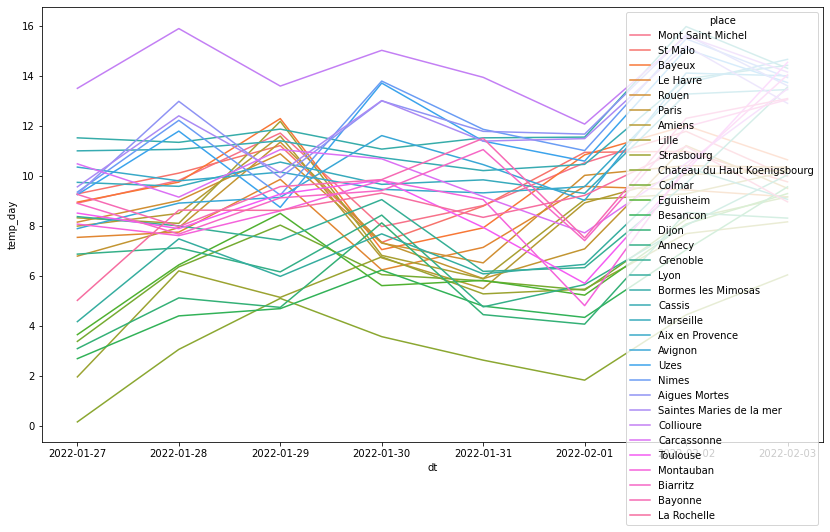

In [68]:
plot_temperature(forecast_df)

### Save weather csv

In [ ]:
forecast_df.to_csv('./data/cities_weather.csv', sep='\t', index=False)

In [87]:
forecast_df.groupby('dt')['temp_day'].max()

dt
2022-01-26    14.14
2022-01-27    12.94
2022-01-28    15.10
2022-01-29    12.65
2022-01-30    15.79
2022-01-31    13.25
2022-02-01    11.88
2022-02-02    16.83
Name: temp_day, dtype: float64

In [69]:
forecast_df.groupby('dt')['temp_day'].max()

dt
2022-01-27    13.49
2022-01-28    15.88
2022-01-29    13.58
2022-01-30    15.01
2022-01-31    13.93
2022-02-01    12.06
2022-02-02    15.96
2022-02-03    14.65
Name: temp_day, dtype: float64

In [70]:
df_ranks = forecast_df.copy()
df_ranks['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)

In [71]:
df_ranks.sort_values('ranking_day', ascending=True)[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max', 'ranking_day']]

dt   place_id                         place  \
211 2022-01-30  282185152                     Collioure   
208 2022-01-27  282185152                     Collioure   
209 2022-01-28  282185152                     Collioure   
210 2022-01-29  282185152                     Collioure   
212 2022-01-31  282185152                     Collioure   
..         ...        ...                           ...   
75  2022-01-30   49750339  Chateau du Haut Koenigsbourg   
73  2022-01-28   49750339  Chateau du Haut Koenigsbourg   
72  2022-01-27   49750339  Chateau du Haut Koenigsbourg   
98  2022-01-29  281814660                      Besancon   
79  2022-02-03   49750339  Chateau du Haut Koenigsbourg   

                                               weather  temp_day  temp_min  \
211  [{'id': 800, 'main': 'Clear', 'description': '...     15.01      8.58   
208  [{'id': 800, 'main': 'Clear', 'description': '...     13.49      7.39   
209  [{'id': 802, 'main': 'Clouds', 'description': ...     15.88      7.98   
210  [{'id': 800, 'main': 'Clear', 'description': '...     13.58      8.72   
212  [{'id': 500, 'main': 'Rain', 'description': 'l...     13.93      8.37   
..                                                 ...       ...       ...   
75   [{'id': 500, 'main': 'Rain', 'description': 'l...      3.56     -1.61   
73   [{'id': 803, 'main': 'Clouds', 'description': ...      3.05     -1.49   
72   [{'id': 600, 'main': 'Snow', 'description': 'l...      0.15     -4.71   
98   [{'id': 803, 'main': 'Clouds', 'description': ...      4.68     -0.87   
79   [{'id': 803, 'main': 'Clouds', 'description': ...      6.03     -0.57   

     temp_max  ranking_day  
211     15.08          1.0  
208     14.44          1.0  
209     16.11          1.0  
210     13.62          1.0  
212     13.93          1.0  
..        ...          ...  
75       4.18         33.0  
73       3.53         33.0  
72       1.73         33.0  
98       5.86         33.0  
79       6.03         33.0  

[264 rows x 8 columns]

Top 7 temperature by day

In [72]:
def top_5(dataframe:pd.DataFrame)->pd.DataFrame:
    df_ranks = dataframe.copy()
    df_ranks['ranking_day'] = dataframe.groupby(['dt'])['temp_day'].rank(ascending=False)#Ranking per highest temp_day 
    #dataframe[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'])
    top_5_cities = df_ranks.groupby('place_id')['ranking_day'].agg('mean').sort_values(ascending=True)[0:6]
    top5_df = df_ranks[(df_ranks['place_id'].isin(top_5_cities.index.to_list())) & (df_ranks['ranking_day'] == 1)]
    print(top5_df.shape)
    return top5_df

In [73]:
top5 = top_5(forecast_df)
top5[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max']].head(8)

(7, 31)


dt   place_id               place  \
142 2022-02-02  282091180  Bormes les Mimosas   
208 2022-01-27  282185152           Collioure   
209 2022-01-28  282185152           Collioure   
210 2022-01-29  282185152           Collioure   
211 2022-01-30  282185152           Collioure   
212 2022-01-31  282185152           Collioure   
213 2022-02-01  282185152           Collioure   

                                               weather  temp_day  temp_min  \
142  [{'id': 802, 'main': 'Clouds', 'description': ...     15.96      6.41   
208  [{'id': 800, 'main': 'Clear', 'description': '...     13.49      7.39   
209  [{'id': 802, 'main': 'Clouds', 'description': ...     15.88      7.98   
210  [{'id': 800, 'main': 'Clear', 'description': '...     13.58      8.72   
211  [{'id': 800, 'main': 'Clear', 'description': '...     15.01      8.58   
212  [{'id': 500, 'main': 'Rain', 'description': 'l...     13.93      8.37   
213  [{'id': 800, 'main': 'Clear', 'description': '...     12.06      7.48   

     temp_max  
142     15.96  
208     14.44  
209     16.11  
210     13.62  
211     15.08  
212     13.93  
213     12.42

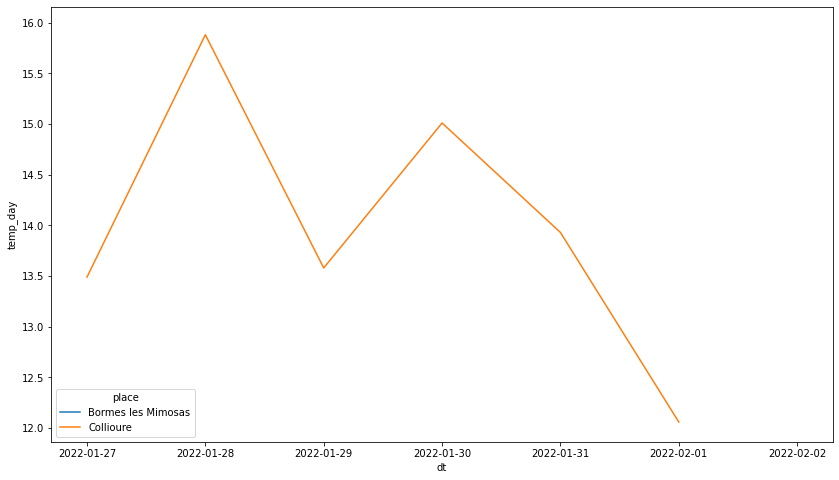

In [74]:
plot_temperature(top5)

There is only one day in the week where collioure isn't the hottest city <br>
The 2nd of February, Bormes les Mimosas has the highest temperature of the day

In [75]:
forecast_df[forecast_df['dt'] == '2022-02-01'].sort_values(by='temp_day', ascending=False)[['dt', 'place_id', 'place', 'weather', 'temp_day', 'temp_min','temp_max']][0:5]

dt   place_id                     place  \
213 2022-02-01  282185152                 Collioure   
197 2022-02-01  282009726             Aigues Mortes   
141 2022-02-01  282091180        Bormes les Mimosas   
205 2022-02-01  282321559  Saintes Maries de la mer   
189 2022-02-01  282310054                     Nimes   

                                               weather  temp_day  temp_min  \
213  [{'id': 800, 'main': 'Clear', 'description': '...     12.06      7.48   
197  [{'id': 800, 'main': 'Clear', 'description': '...     11.66      7.21   
141  [{'id': 800, 'main': 'Clear', 'description': '...     11.54      5.23   
205  [{'id': 800, 'main': 'Clear', 'description': '...     11.48      7.15   
189  [{'id': 800, 'main': 'Clear', 'description': '...     11.00      5.07   

     temp_max  
213     12.42  
197     12.24  
141     12.10  
205     12.28  
189     11.51

> The best city the next 5 days is Collioure

In [76]:
forecast_df['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)
#forecast_df['points_day'] = forecast_df['ranking_day']
forecast_df[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'], ascending=[True, True])

dt                         place  temp_day  ranking_day
208 2022-01-27                     Collioure     13.49          1.0
136 2022-01-27            Bormes les Mimosas     11.51          2.0
144 2022-01-27                        Cassis     10.99          3.0
216 2022-01-27                   Carcassonne     10.47          4.0
160 2022-01-27               Aix en Provence     10.34          5.0
..         ...                           ...       ...          ...
135 2022-02-03                          Lyon      9.05         29.0
263 2022-02-03                   La Rochelle      8.95         30.0
111 2022-02-03                         Dijon      8.30         31.0
71  2022-02-03                    Strasbourg      8.15         32.0
79  2022-02-03  Chateau du Haut Koenigsbourg      6.03         33.0

[264 rows x 4 columns]

### Average ranking of best temperatures

In [77]:
forecast_df.groupby(['place_id','place'])['ranking_day'].agg('mean').sort_values(ascending=True)

place_id   place                       
282185152  Collioure                        1.7500
282091180  Bormes les Mimosas               3.8750
282009726  Aigues Mortes                    6.1250
282310054  Nimes                            6.5000
281762295  Cassis                           7.0000
282321559  Saintes Maries de la mer         7.4375
282263463  Uzes                             8.9375
281716908  Aix en Provence                  9.6250
124969     Marseille                       11.3750
281690754  Carcassonne                     12.2500
16761933   Avignon                         12.8750
281962470  Bayeux                          13.2500
151486647  Mont Saint Michel               13.5000
282243106  Bayonne                         13.5000
282098015  St Malo                         13.8125
281846455  Biarritz                        16.5000
282186420  Toulouse                        16.7500
122848     Rouen                           17.1250
121668     Lille                          

### Top 5 cities with highest mean temperature

In [78]:
top_5 = forecast_df.groupby(['place_id','place'])['temp_day'].agg('mean').sort_values(ascending=False)[0:5].to_frame().reset_index()
top_5

place_id                     place  temp_day
0  282185152                 Collioure  14.20875
1  282091180        Bormes les Mimosas  12.38250
2  282009726             Aigues Mortes  12.22375
3  282310054                     Nimes  12.09875
4  282321559  Saintes Maries de la mer  12.00000

In [79]:
top_5 = top_5.astype({'place_id':np.int64})

In [82]:
top_cities = coord_top_5.merge(top_5, left_on='place_id', right_on='place_id', suffixes=(None, '_y') )[['place_id', 'place', 'lat', 'lon', 'display_name', 'temp_day']]
top_cities

place_id                     place       lat       lon  \
0  282091180        Bormes les Mimosas  43.15625  6.328125   
1  282310054                     Nimes  43.84375  4.359375   
2  282009726             Aigues Mortes  43.56250  4.191406   
3  282321559  Saintes Maries de la mer  43.43750  4.429688   
4  282185152                 Collioure  42.53125  3.083984   

                                        display_name  temp_day  
0  Bormes-les-Mimosas, Toulon, Var, Provence-Alpe...  12.38250  
1  Nîmes, Gard, Occitanie, France métropolitaine,...  12.09875  
2  Aigues-Mortes, Nîmes, Gard, Occitanie, France ...  12.22375  
3  Saintes-Maries-de-la-Mer, Arles, Bouches-du-Rh...  12.00000  
4  Collioure, Céret, Pyrénées-Orientales, Occitan...  14.20875

In [83]:
import plotly.graph_objects as go

import plotly.express as px

In [84]:

def plot_map(X, cluster_column, cluster_centers=None, title='Hot zones', size='temp_day'):
    '''
    X: dataframe with Lat et Lon features
    cluster_column: Name of the column containing the cluster
    cluster_centers: Centers of clusters
    '''
    
    fig = px.scatter_mapbox(X, lat="lat", lon="lon", color=cluster_column, zoom=4, mapbox_style="carto-positron", 
                            size=size,
                             hover_data=['place'],
                            title=title)
    
    
    fig.update_layout(autosize=False, width=850, height=600)

    fig.show()

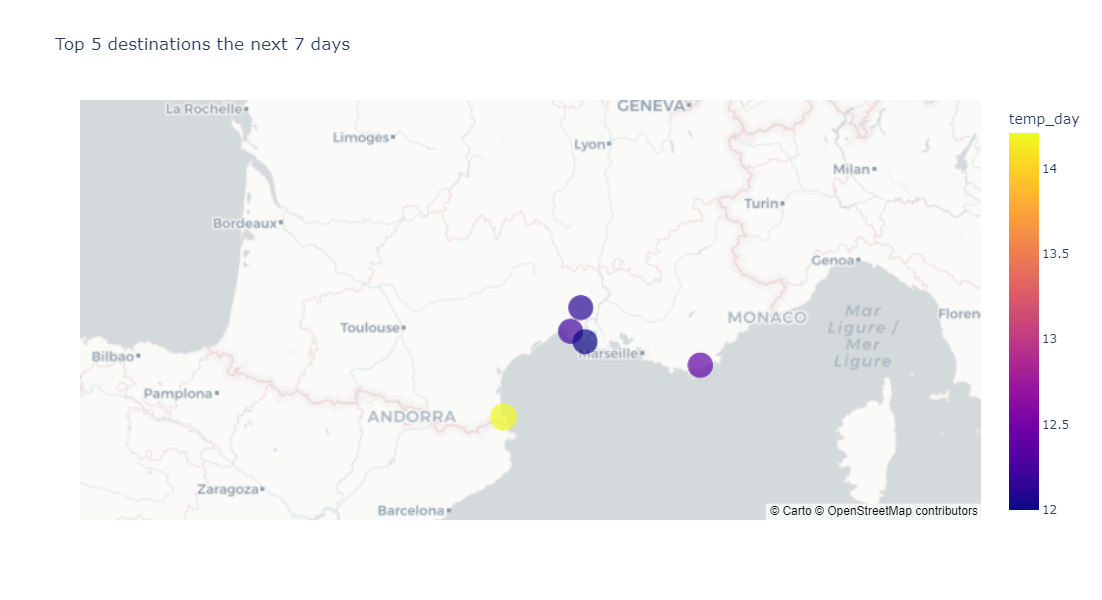

In [85]:
plot_map(top_cities, 'temp_day', title='Top 5 destinations the next 7 days')

### Top 20 hotels in top 5 cities

The file booking_result was scrapped using the Spider in kayak/spiders

In [87]:
hotels = pd.read_csv('../data/booking_result.csv')

In [88]:
hotels.head(5)

city                       name  \
0  Mont Saint Michel  Mercure Mont Saint Michel   
1  Mont Saint Michel                 Hôtel Vert   
2  Mont Saint Michel          Hotel De La Digue   
3  Mont Saint Michel            Le Saint Aubert   
4  Mont Saint Michel         La Vieille Auberge   

                                                 url  latitude  longitude  \
0                /hotel/fr/mont-saint-michel.fr.html -1.510545  48.614247   
1                             /hotel/fr/vert.fr.html -1.509617  48.614700   
2                      /hotel/fr/de-la-digue.fr.html -1.510918  48.616882   
3               /hotel/fr/hotel-saint-aubert.fr.html -1.510105  48.612938   
4  /hotel/fr/la-vieille-auberge-le-mont-saint-mic... -1.511457  48.636063   

                                                desc  etoiles note reviews  
0  Installé dans des espaces verts à seulement 2 ...      4.0  8,2   3 140  
1  Situé à 2 km du Mont-Saint-Michel, sur la côte...      2.0  8,1   3 670  
2  L'hôtel De La Digue est un établissement tradi...      3.0  7,2   1 926  
3  Niché dans un écrin de verdure, à seulement 2 ...      3.0  7,4   1 257  
4  La Vieille Auberge se trouve dans le village m...      2.0  7,5   1 260

In [301]:
top_cities['place']

0          Bormes les Mimosas
1                       Nimes
2               Aigues Mortes
3    Saintes Maries de la mer
4                   Collioure
Name: place, dtype: object

In [89]:
top20_hotels = hotels[hotels['city'].isin(top_cities['place'].values)]
top20_hotels = top20_hotels.sort_values('note', ascending=False)[0:21]

In [90]:
top20_hotels = top20_hotels.rename(columns={'latitude':'lon', 'longitude':'lat', 'city':'place'})

In [91]:
top20_hotels['note'] = top20_hotels['note'].str.replace(',', '.')

In [92]:
top20_hotels = top20_hotels.astype({'note':np.float16})
top20_hotels = top20_hotels.astype({'reviews':np.float16})

In [93]:
top20_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 4515 to 3593
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   place    21 non-null     object 
 1   name     21 non-null     object 
 2   url      21 non-null     object 
 3   lon      21 non-null     float64
 4   lat      21 non-null     float64
 5   desc     21 non-null     object 
 6   etoiles  14 non-null     float64
 7   note     21 non-null     float16
 8   reviews  21 non-null     float16
dtypes: float16(2), float64(3), object(4)
memory usage: 1.4+ KB


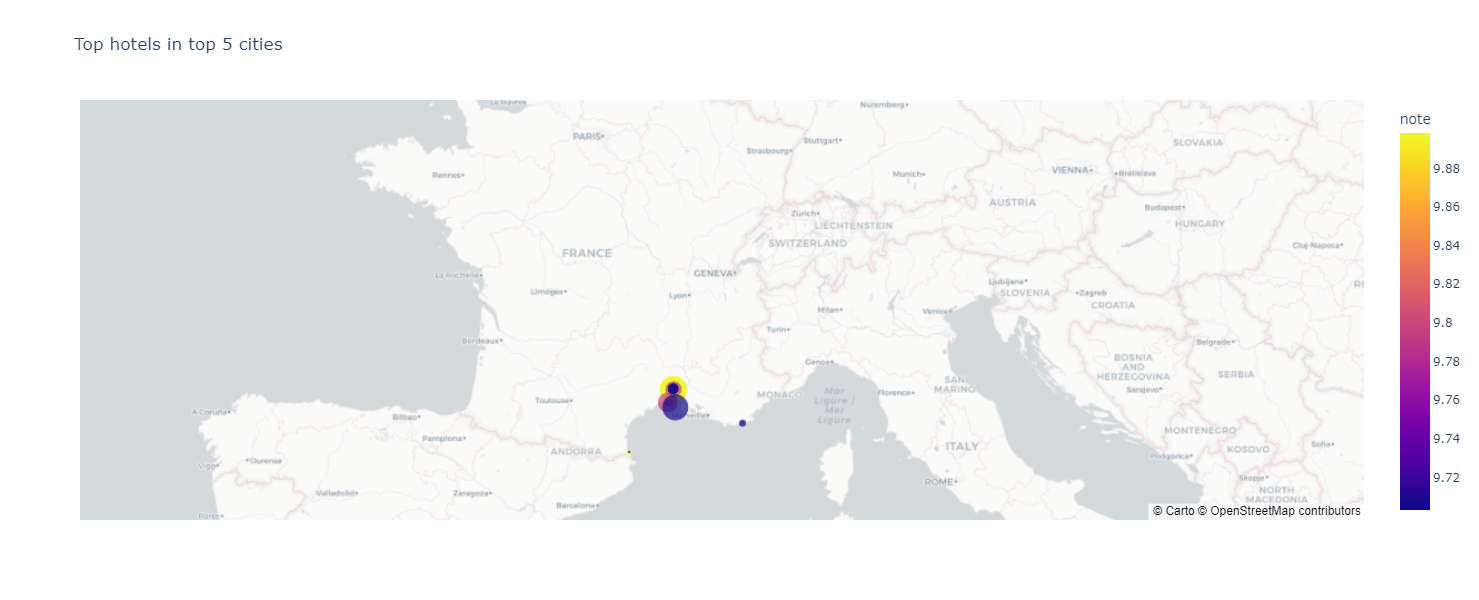

In [94]:
plot_map(top20_hotels, cluster_column='note', size='reviews', title='Top hotels in top 5 cities')